In [1]:
#pip install requests pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import requests

In [3]:
url = "https://reddit-stock-and-crypto-tracker.p.rapidapi.com/all/page/1"

querystring = {"date":"last_month","page":"1"}

headers = {
	"X-RapidAPI-Key": "627572a165msh45d3a36cc2f7442p1dfd7ejsnb293b124b04d",
	"X-RapidAPI-Host": "reddit-stock-and-crypto-tracker.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

response.status_code
response.content

b'{"count":1299,"pages":13,"current_page":1,"results":[{"rank":1,"ticker":"PLTR","name":"Palantir","mentions":747,"upvotes":4407,"rank_24h_ago":6,"mentions_24h_ago":141},{"rank":2,"ticker":"SPY","name":"SPDR S&amp;P 500 ETF Trust","mentions":468,"upvotes":3189,"rank_24h_ago":3,"mentions_24h_ago":239},{"rank":3,"ticker":"OPEN","name":"Opendoor","mentions":321,"upvotes":1555,"rank_24h_ago":7,"mentions_24h_ago":159},{"rank":4,"ticker":"BTC.X","name":"Bitcoin","mentions":307,"upvotes":2480,"rank_24h_ago":2,"mentions_24h_ago":273},{"rank":5,"ticker":"UNH","name":"UnitedHealth","mentions":299,"upvotes":1755,"rank_24h_ago":1,"mentions_24h_ago":320},{"rank":6,"ticker":"AMD","name":"AMD","mentions":286,"upvotes":1549,"rank_24h_ago":5,"mentions_24h_ago":127},{"rank":7,"ticker":"NVDA","name":"NVIDIA","mentions":210,"upvotes":1150,"rank_24h_ago":9,"mentions_24h_ago":98},{"rank":8,"ticker":"HIMS","name":"Hims &amp; Hers Health","mentions":205,"upvotes":1004,"rank_24h_ago":27,"mentions_24h_ago":23},

### Data Preparation

In [4]:
data = response.json()

df = pd.DataFrame(data['results'])

# Fix types and fill missing values
df['mentions'] = df['mentions'].astype(int)
df['upvotes'] = df['upvotes'].astype(int)
df['mentions_24h_ago'] = df['mentions_24h_ago'].fillna(0).astype(int)
df['rank_24h_ago'] = df['rank_24h_ago'].fillna(0).astype(int)

# Optional metrics
df['mention_change'] = df['mentions'] - df['mentions_24h_ago']
df['rank_change'] = df['rank_24h_ago'] - df['rank']

### Visualization

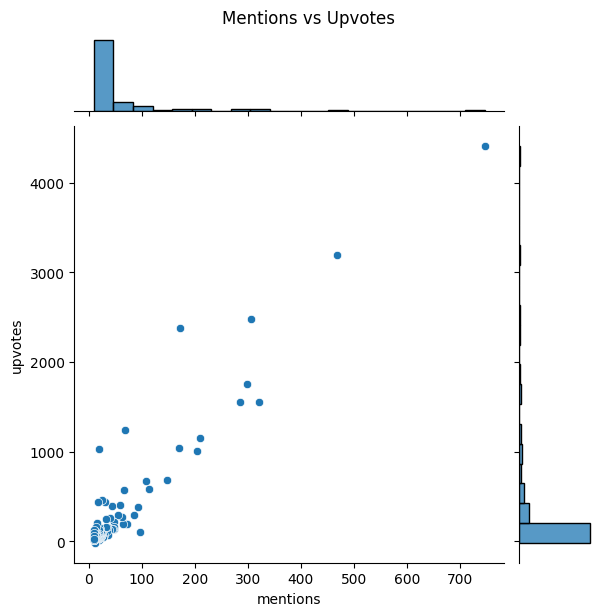

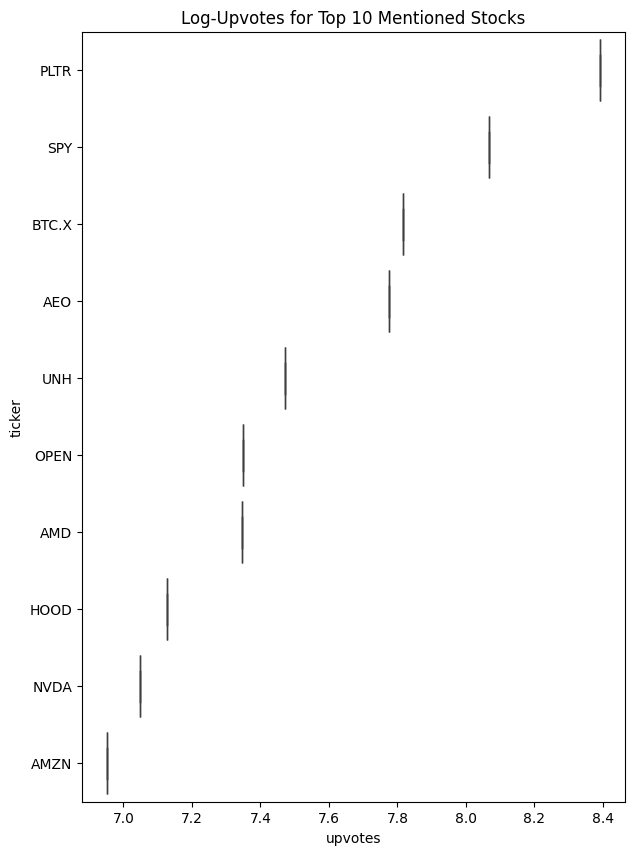

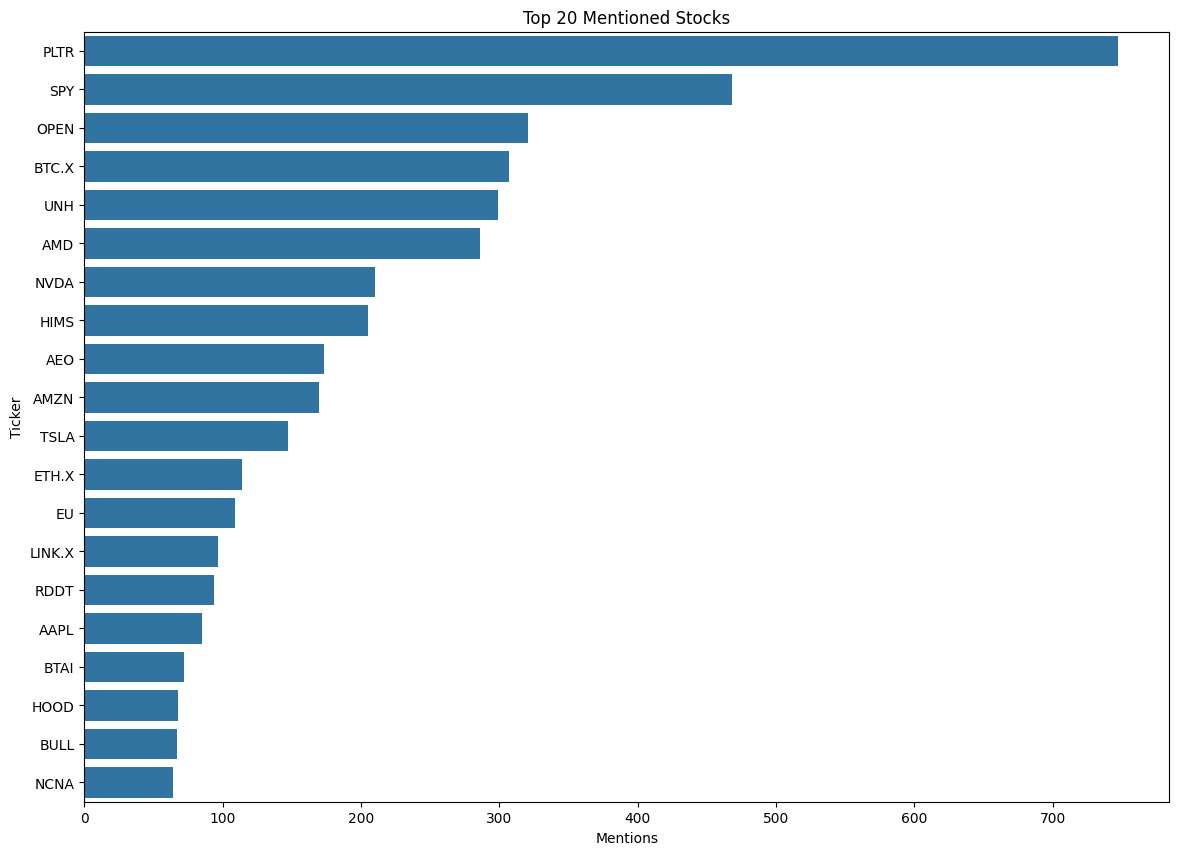

In [5]:
# Mentions vs Upvotes
sns.jointplot(x='mentions', y='upvotes', data=df)
plt.suptitle('Mentions vs Upvotes', y=1.02)
plt.show()

# Boxplot: Upvotes distribution (log scale) by Top 10 Tickers
top10 = df.nlargest(10, 'upvotes')
plt.figure(figsize=(7, 10))
sns.boxplot(x=top10['upvotes'].apply(lambda x: np.log(x+1)), y=top10['ticker'])
plt.title('Log-Upvotes for Top 10 Mentioned Stocks')
plt.show()

# Countplot: Top 20 Most Mentioned Stocks
plt.figure(figsize=(14, 10))
top_mentions = df.nlargest(20, 'mentions')
sns.barplot(y='ticker', x='mentions', data=top_mentions)
plt.title('Top 20 Mentioned Stocks')
plt.xlabel('Mentions')
plt.ylabel('Ticker')
plt.show()

In [6]:
df['mentions']=df['mentions'].astype(int)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [10]:
df.head()

,rank,ticker,name,mentions,upvotes,rank_24h_ago,mentions_24h_ago,mention_change,rank_change
0,1,PLTR,Palantir,747,4407,6,141,606,5
1,2,SPY,SPDR S&amp;P 500 ETF Trust,468,3189,3,239,229,1
2,3,OPEN,Opendoor,321,1555,7,159,162,4
3,4,BTC.X,Bitcoin,307,2480,2,273,34,-2
4,5,UNH,UnitedHealth,299,1755,1,320,-21,-4


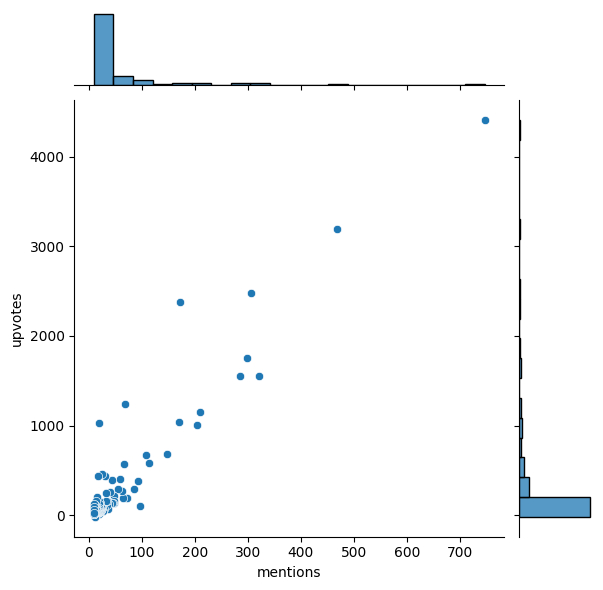

In [18]:
sns.jointplot(x=df['mentions'].astype(int), y=df['upvotes'].astype(int))


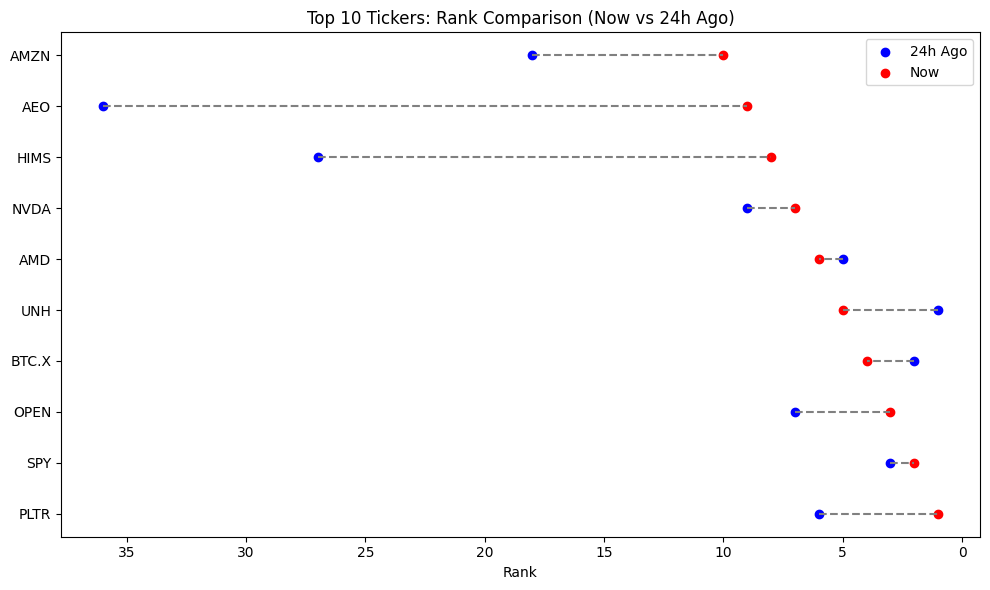

In [21]:
top_10 = df.nsmallest(10, 'rank').copy()
tickers = top_10['ticker']
y = np.arange(len(tickers))

plt.figure(figsize=(10, 6))
plt.scatter(top_10['rank_24h_ago'], y, label='24h Ago', color='blue')
plt.scatter(top_10['rank'], y, label='Now', color='red')

for i in range(len(tickers)):
    plt.plot([top_10['rank_24h_ago'].iloc[i], top_10['rank'].iloc[i]], [y[i], y[i]], color='gray', linestyle='--')

plt.yticks(y, tickers)
plt.gca().invert_xaxis()
plt.xlabel("Rank")
plt.title("Top 10 Tickers: Rank Comparison (Now vs 24h Ago)")
plt.legend()
plt.tight_layout()
plt.show()
